In [1]:
import pandas as pd 
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import random 
# from sklearn import linear_model

In [2]:
# The dataset comes from the website open food facts.
!wc -l 'csv_files/data.csv'

2686037 csv_files/data.csv


In [5]:
# The CSV file is too big to be read at once.
# (2_686_036 rows, 196 columns)
data_en = pd.read_csv('./csv_files/data.csv', sep='\t', nrows=5)
data_en

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,Andrè,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1656488106,2022-06-29T07:35:06Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,Skyr,NaN,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I want to create a very short list of interesting features found in the [features description](https://world.openfoodfacts.org/data/data-fields.txt) to start with.

- code
- product_name
- categories
- nutrition_grade_fr
- nutrition-score-fr_100g
- main_category
- main_category_fr



In [6]:
features = ['code',
            'product_name',
            'categories',
            'main_category',
            'main_category_fr',
            'nutrition_grade_fr',
            'nutrition-score-fr_100g',
            ]

# selecting only those columns on the first 200_000 products.
data_sel = pd.read_csv('./csv_files/data.csv',
                   sep='\t',
                   usecols=features,
                   nrows=2e5)


ValueError: Usecols do not match columns, columns expected but not found: ['main_category_fr', 'nutrition_grade_fr']

In [7]:
# feature_fr seem to not be included. Let's try with another CSV file
# provided in the OpenClassrooms website.
data_fr = pd.read_csv('./csv_files/fr.openfoodfacts.org.products.csv',
                      sep='\t',
                      nrows=5)


In [8]:
data_fr.shape

(5, 162)

In [9]:
# the features list is not the same. (196 != 162)
features_only_fr = data_fr.columns.difference(data_en.columns)
print(features_only_fr)
print(len(features_only_fr))

Index(['additives_fr', 'allergens_fr', 'alpha-linolenic-acid_100g',
       'arachidic-acid_100g', 'arachidonic-acid_100g', 'behenic-acid_100g',
       'butyric-acid_100g', 'capric-acid_100g', 'caproic-acid_100g',
       'caprylic-acid_100g', 'categories_fr', 'cerotic-acid_100g',
       'countries_fr', 'dihomo-gamma-linolenic-acid_100g',
       'docosahexaenoic-acid_100g', 'eicosapentaenoic-acid_100g',
       'elaidic-acid_100g', 'erucic-acid_100g', 'fructose_100g',
       'gamma-linolenic-acid_100g', 'glucose_100g', 'gondoic-acid_100g',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'labels_fr',
       'lactose_100g', 'lauric-acid_100g', 'lignoceric-acid_100g',
       'linoleic-acid_100g', 'main_category_fr', 'maltodextrins_100g',
       'maltose_100g', 'mead-acid_100g', 'melis

In [10]:
features_only_en = data_en.columns.difference(data_fr.columns)
print(features_only_en)
print(len(features_only_en))

Index(['-alpha-linolenic-acid_100g', '-arachidic-acid_100g',
       '-arachidonic-acid_100g', '-behenic-acid_100g', '-butyric-acid_100g',
       '-capric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-cerotic-acid_100g', '-dihomo-gamma-linolenic-acid_100g',
       '-docosahexaenoic-acid_100g', '-eicosapentaenoic-acid_100g',
       '-elaidic-acid_100g', '-erucic-acid_100g', '-fructose_100g',
       '-gamma-linolenic-acid_100g', '-glucose_100g', '-gondoic-acid_100g',
       '-lactose_100g', '-lauric-acid_100g', '-lignoceric-acid_100g',
       '-linoleic-acid_100g', '-maltodextrins_100g', '-maltose_100g',
       '-mead-acid_100g', '-melissic-acid_100g', '-montanic-acid_100g',
       '-myristic-acid_100g', '-nervonic-acid_100g', '-oleic-acid_100g',
       '-palmitic-acid_100g', '-stearic-acid_100g', '-sucrose_100g',
       'abbreviated_product_name', 'additives_en', 'allergens_en',
       'beta-glucan_100g', 'brand_owner',
       'carbon-footprint-from-meat-or-fish_100g'

In [11]:
# More features are common. Need to strip for matching.
features_mod = {feat: feat.lstrip(' -') for feat in data_en.columns}

In [12]:
data_en.rename(columns=features_mod, inplace=True)

In [13]:
features_only_en = data_en.columns.difference(data_fr.columns)
print(features_only_en)
print(len(features_only_en))

Index(['abbreviated_product_name', 'additives_en', 'allergens_en',
       'beta-glucan_100g', 'brand_owner',
       'carbon-footprint-from-meat-or-fish_100g', 'carnitine_100g',
       'categories_en', 'choline_100g', 'completeness', 'countries_en',
       'data_quality_errors_tags', 'ecoscore_grade', 'ecoscore_score',
       'energy-kcal_100g', 'energy-kj_100g', 'food_groups', 'food_groups_en',
       'food_groups_tags', 'fruits-vegetables-nuts-dried_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'fruits-vegetables-nuts-estimate_100g', 'image_ingredients_small_url',
       'image_ingredients_url', 'image_nutrition_small_url',
       'image_nutrition_url', 'ingredients_analysis_tags', 'ingredients_tags',
       'inositol_100g', 'insoluble-fiber_100g', 'labels_en',
       'last_image_datetime', 'last_image_t', 'main_category_en', 'nova_group',
       'nutrient_levels_tags', 'nutriscore_grade', 'nutriscore_score',
       'origins_en', 'owner', 'packaging_en'

In [14]:
features_only_fr = data_fr.columns.difference(data_en.columns)
print(features_only_fr)
print(len(features_only_fr))

Index(['additives_fr', 'allergens_fr', 'categories_fr', 'countries_fr',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'labels_fr',
       'main_category_fr', 'nutrition_grade_fr', 'nutrition_grade_uk',
       'states_fr', 'traces_fr'],
      dtype='object')
16


In [15]:
50 - 16 == 196 - 162

True

In [17]:
# From above, I see that nothing important seem to be missing
# in the 'world' data set. Differences are mainly about translation.
# Information about 'palm_oil' (which seem to be missing) are probably
# contained in the feature named 'ecoscore'.
common_features = data_en.columns.intersection(data_fr.columns)
print(len(common_features))

146


### Wondering if the world data set is an extension of the french one

In [ ]:
# Are those really common, or can I find information in one CSV file
# and not in the other?
categories_en = pd.read_csv('./csv_files/data.csv',
                            usecols=['code','categories'],
                            sep='\t')
categories_fr = pd.read_csv('./csv_files/fr.openfoodfacts.org.products.csv',
                            usecols=['code','categories'],
                            sep='\t')

In [ ]:
print(categories_en.shape)
print(categories_en.isnull().mean())
print(categories_fr.shape)
print(categories_fr.isnull().mean())

(2686036, 2)
code          0.000000
categories    0.586775
dtype: float64
(320772, 2)
code          0.000072
categories    0.736854
dtype: float64


In [ ]:
# The second data set has more missing values in percentage
# (regarding categories).
both_categories = categories_en.join(categories_fr.set_index('code'),
                                     on='code',
                                     how='outer',
                                     rsuffix='_fr')

In [ ]:
both_categories.shape

(2758010, 3)

In [ ]:
both_categories.shape[0]-categories_en.shape[0]

71974

In [ ]:
# If my hypothesis is correct (that the world database was made after
# the french one), quite a lot of products were not copied... Or they
# changed 'code' in between... Thus code is not a good identifier ?
both_categories.columns

Index(['code', 'categories', 'categories_fr'], dtype='object')

In [ ]:
both_categories.head(15)

,code,categories,categories_fr
0.0,00000000000000225,NaN,NaN
1.0,0000000000000207025004,NaN,NaN
2.0,00000000000003429145,NaN,NaN
3.0,00000000000026772226,"Produits laitiers, Desserts, Produits fermenté...",NaN
4.0,0000000000017,NaN,NaN
5.0,0000000000031,NaN,NaN
6.0,000000000003327986,NaN,NaN
7.0,000000000004128579,NaN,NaN
8.0,000000000004622327,NaN,NaN
9.0,00000000001,NaN,NaN


In [ ]:
diff = (both_categories.
        loc[both_categories.categories 
            != both_categories.categories_fr])
diff.shape

(2757074, 3)

In [ ]:
equal = (both_categories.
         loc[both_categories.categories 
             == both_categories.categories_fr])
equal.shape

(936, 3)

In [ ]:
equal.tail(10)

,code,categories,categories_fr
2652343.0,9312726002758,Hommus Dip,Hommus Dip
2652787.0,9314137003263,Psyllium husk,Psyllium husk
2653442.0,9315822010863,Frozen Dumplings,Frozen Dumplings
2653598.0,9316131600592,Coconut flour,Coconut flour
2653661.0,9316401200460,Snacks,Snacks
2653874.0,9317224401058,Taco Shells,Taco Shells
2654205.0,9318020601000,Cherry Juice,Cherry Juice
2665406.0,93695152,Meat Paste,Meat Paste
2666092.0,9400547012114,Canned apricots,Canned apricots
2666134.0,9400550602487,Chocolate covered muesli bar,Chocolate covered muesli bar


<AxesSubplot: >

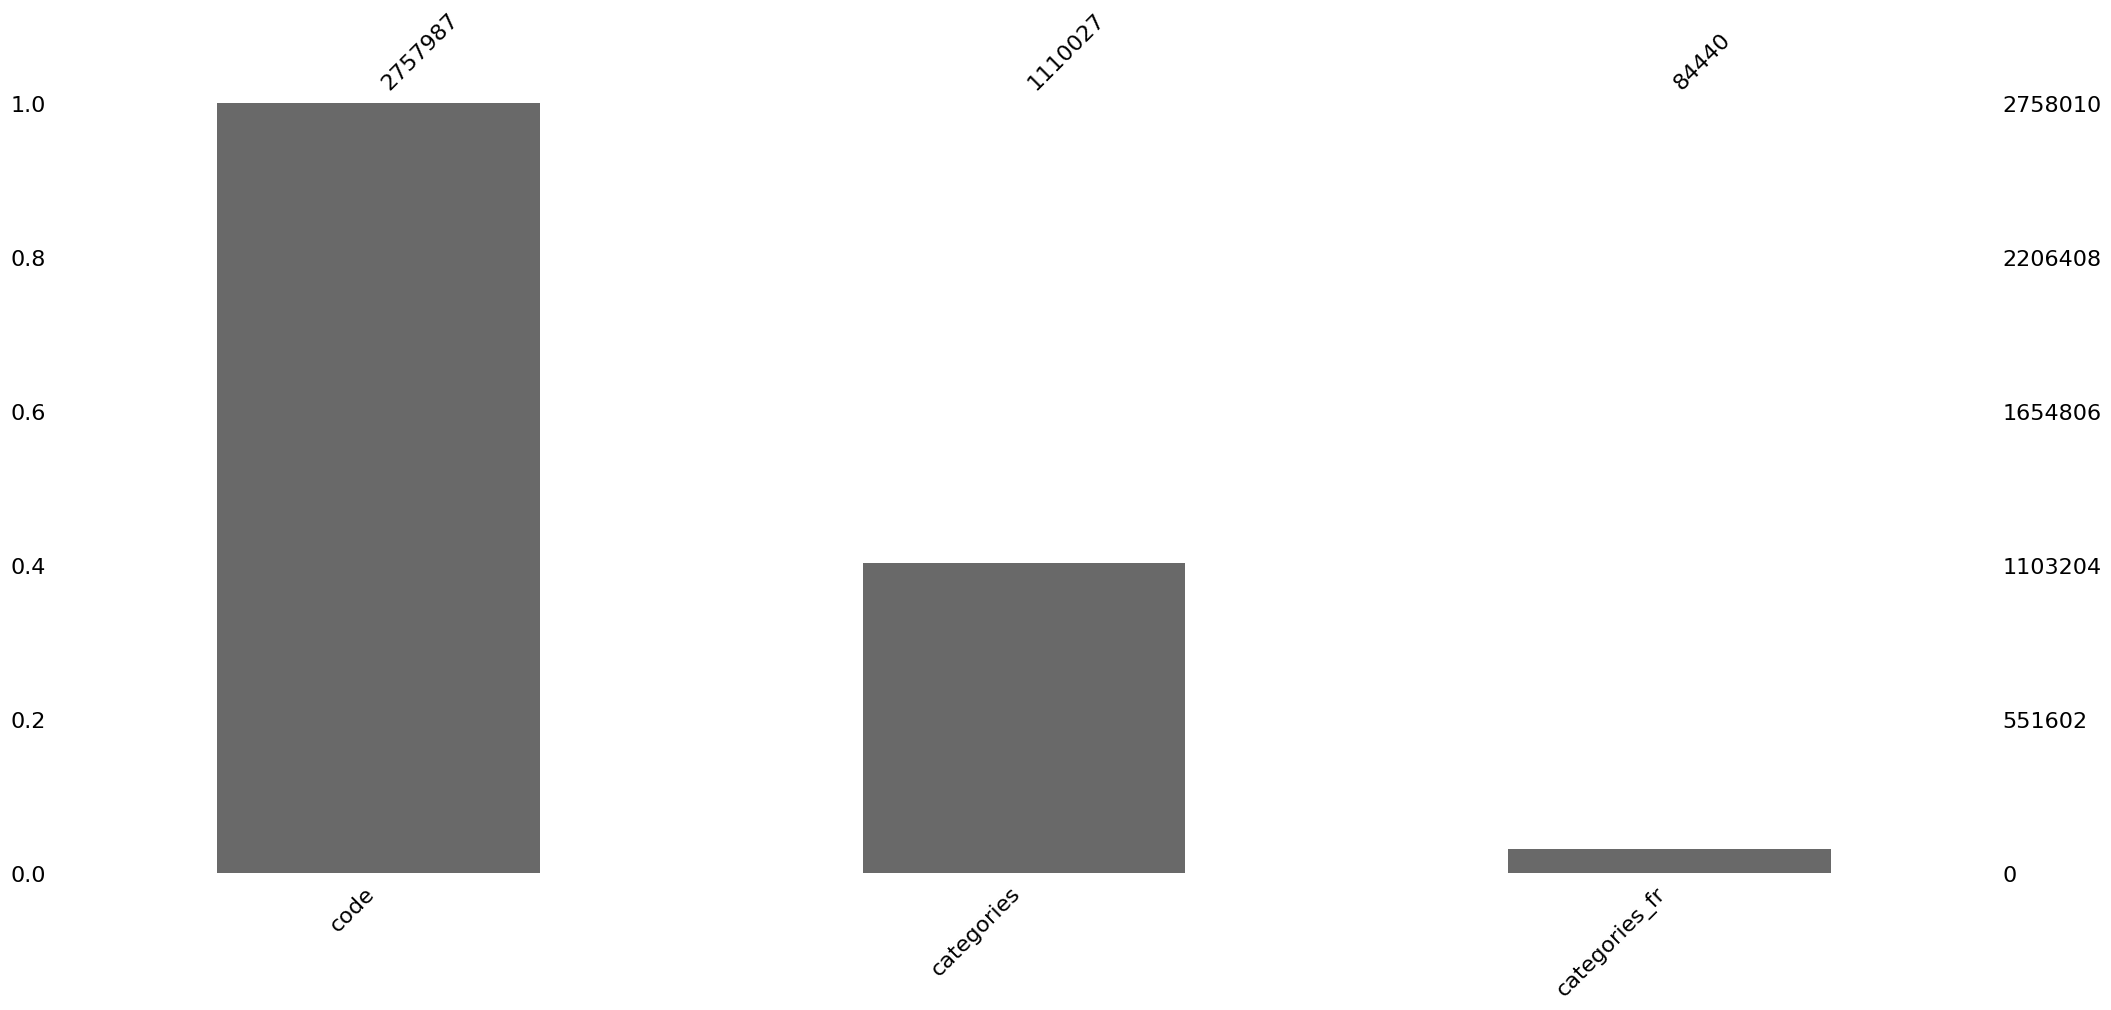

In [ ]:
msno.bar(both_categories)

I'm going to work with the world database (more info) ignoring that I could possibly try to search missing values in the other dataset for time purpose. 

#### visual inspection of all columns available

As the website does not seem to be updated...

In [18]:
data = pd.read_csv('./csv_files/data.csv',
                   sep='\t',
                   nrows=1)

In [19]:
for feat in data.columns:
    print(feat)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_en
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
ingredients_tags
ingredients_analysis_tags
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
food_groups
food_groups_tags
food_groups_en
states
states_tags
states_en
brand_owner
ecoscore_score
ecoscore_grade
nutrient_levels_tags
product_quantity
owner
data_quality_errors_tags
unique_scans_n
popularity_tags
completeness

I copied that in 'features.txt'

First I want to see the difference between some features and their _tags version.

After that, I will start a list of features to inspect.

In [20]:
mycols = ['packaging',
          'packaging_tags',
          'manufacturing_places',
          'manufacturing_places_tags',
          'countries',
          'countries_tags']

data = pd.read_csv('./csv_files/data.csv',
                   sep='\t',
                   nrows=20000,
                   usecols=mycols)

In [21]:
data.head(20)

,packaging,packaging_tags,manufacturing_places,manufacturing_places_tags,countries,countries_tags
0,NaN,NaN,NaN,NaN,en:france,en:france
1,NaN,NaN,NaN,NaN,en:de,en:germany
2,NaN,NaN,NaN,NaN,Spain,en:spain
3,NaN,NaN,NaN,NaN,France,en:france
4,NaN,NaN,NaN,NaN,France,en:france
5,NaN,NaN,NaN,NaN,France,en:france
6,NaN,NaN,NaN,NaN,Espagne,en:spain
7,NaN,NaN,NaN,NaN,en:es,en:spain
8,NaN,NaN,NaN,NaN,en:es,en:spain
9,NaN,NaN,NaN,NaN,en:United States,en:united-states


In [22]:
print(data.countries.value_counts())
print(f'total : {data.countries.value_counts().sum()}\n')
print(data.countries_tags.value_counts())
print(f'total : {data.countries_tags.value_counts().sum()}\n')

United States                                10099
en:us                                         4076
France                                        1003
en:United States                               881
en:fr                                          749
                                             ...  
Royaume-Uni, en:france                           1
Franciaország,Nagy-Britannia,Magyarország        1
en:gi                                            1
República Dominicana                             1
France,Germany,Spain                             1
Name: countries, Length: 291, dtype: int64
total : 19955

en:united-states            15688
en:france                    2202
en:united-kingdom             356
en:spain                      351
en:canada                     282
                            ...  
en:moldova                      1
en:south-africa                 1
en:gibraltar                    1
en:france,en:switzerland        1
en:belgium,en:spain             1
Name: c

In [23]:
print(data.packaging.value_counts())
print(f'total : {data.packaging.value_counts().sum()}\n')
print(data.packaging_tags.value_counts())
print(f'total : {data.packaging_tags.value_counts().sum()}\n')

Plastic                          45
Plastique                        25
Plastique, Sachet                17
Carton                           16
en:card-box                      15
                                 ..
אט                                1
Cartone                           1
Ldpe-bag, Plastic - film          1
Plastique, Boîte en plastique     1
Glass, Paper, Bottle              1
Name: packaging, Length: 440, dtype: int64
total : 846

en:plastic                          83
en:bag                              27
en:plastic,en:bag                   26
en:pet-bottle                       23
en:canned                           20
                                    ..
en:8                                 1
en:אט                                1
en:ldpe-bag,en:plastic-film          1
en:plastic,fr:boite-en-plastique     1
en:glass,en:paper,en:bottle          1
Name: packaging_tags, Length: 360, dtype: int64
total : 846



In [24]:
print(data.manufacturing_places.value_counts())
print(f'total : {data.manufacturing_places.value_counts().sum()}\n')
print(data.manufacturing_places_tags.value_counts())
print(f'total : {data.manufacturing_places_tags.value_counts().sum()}\n')

Royaume-Uni                             30
France                                  17
Italie                                  14
United Kingdom                          13
United States                           12
                                        ..
87500 Saint Yrieix                       1
Ireland                                  1
Good Organics Gmbh                       1
Allemagne                                1
Avery Island,Luisiana,Estados Unidos     1
Name: manufacturing_places, Length: 103, dtype: int64
total : 227

royaume-uni                             31
france                                  19
italie                                  14
united-kingdom                          13
united-states                           12
                                        ..
black-sheep-brewery                      1
ukraine                                  1
87500-saint-yrieix                       1
ireland                                  1
avery-island,luisiana,estados-

_tags version seem to be processed columns with some sort of standardization.

Based on the name, I'd like to have a look at :

- code
- product_name
- generic_name
- quantity
- brands
- categories
- packaging_tags
- origins_tags
- labels_tags
- countries_tags
- ingredients_tags
- ingredients_fr
- nutriscore_score
- nutriscore_grade
- food_groups_tags
- ecoscore_grade
- ecoscore_score
- data_quality_errors_tags
- popularity_tags
- completeness   
- main_category
- additives_n
- additives_tags
- nova_group
- carbon-footprint_100g
- carbon-footprint-from-meat-or-fish_100g
- nutrition-score-fr_100g
- nutrition-score-uk_100g
- glycemic-index_100g

note : nova (how much the product has been modified)

I found a better [description of the data fields ?](https://wiki.openfoodfacts.org/Data_fields)


In [6]:
with open('./features_first_selection.txt') as fin:
    features = [feat.strip('- \n')for feat in fin]
features

['code',
 'product_name',
 'generic_name',
 'quantity',
 'brands',
 'categories',
 'packaging_tags',
 'origins_tags',
 'labels_tags',
 'countries_tags',
 'ingredients_tags',
 'nutriscore_score',
 'nutriscore_grade',
 'food_groups_tags',
 'ecoscore_grade',
 'ecoscore_score',
 'data_quality_errors_tags',
 'popularity_tags',
 'completeness',
 'main_category',
 'additives_n',
 'additives_tags',
 'nova_group',
 'carbon-footprint_100g',
 'carbon-footprint-from-meat-or-fish_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g',
 'glycemic-index_100g']

In [7]:
# # Opening a sample of products, randomly chosen.
# rows = 2_686_037
# sample_size = int(1e5) 
# # The rows numbers to be skipped (keeping 0 which contains 
# # columns name) :
# skiprows = sorted(random.sample(range(1, rows+1), rows+1-sample_size))

# Skipping rows goes through the whole file. It is not much faster.
# I can keep all lines, as there is no memory problem.
data = pd.read_csv('./csv_files/data.csv',
                   sep='\t',
                   #skiprows=skiprows,
                   usecols=features,
                   dtype={'code': 'object'})

/tmp/ipykernel_10200/2953528614.py:10: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./csv_files/data.csv',


In [8]:
print(data.dtypes)
print(data.shape)

code                                        object
product_name                                object
generic_name                                object
quantity                                    object
packaging_tags                              object
brands                                      object
categories                                  object
origins_tags                                object
labels_tags                                 object
countries_tags                              object
ingredients_tags                            object
additives_n                                float64
additives_tags                              object
nutriscore_score                           float64
nutriscore_grade                            object
nova_group                                 float64
food_groups_tags                            object
ecoscore_score                             float64
ecoscore_grade                              object
data_quality_errors_tags       

<AxesSubplot: >

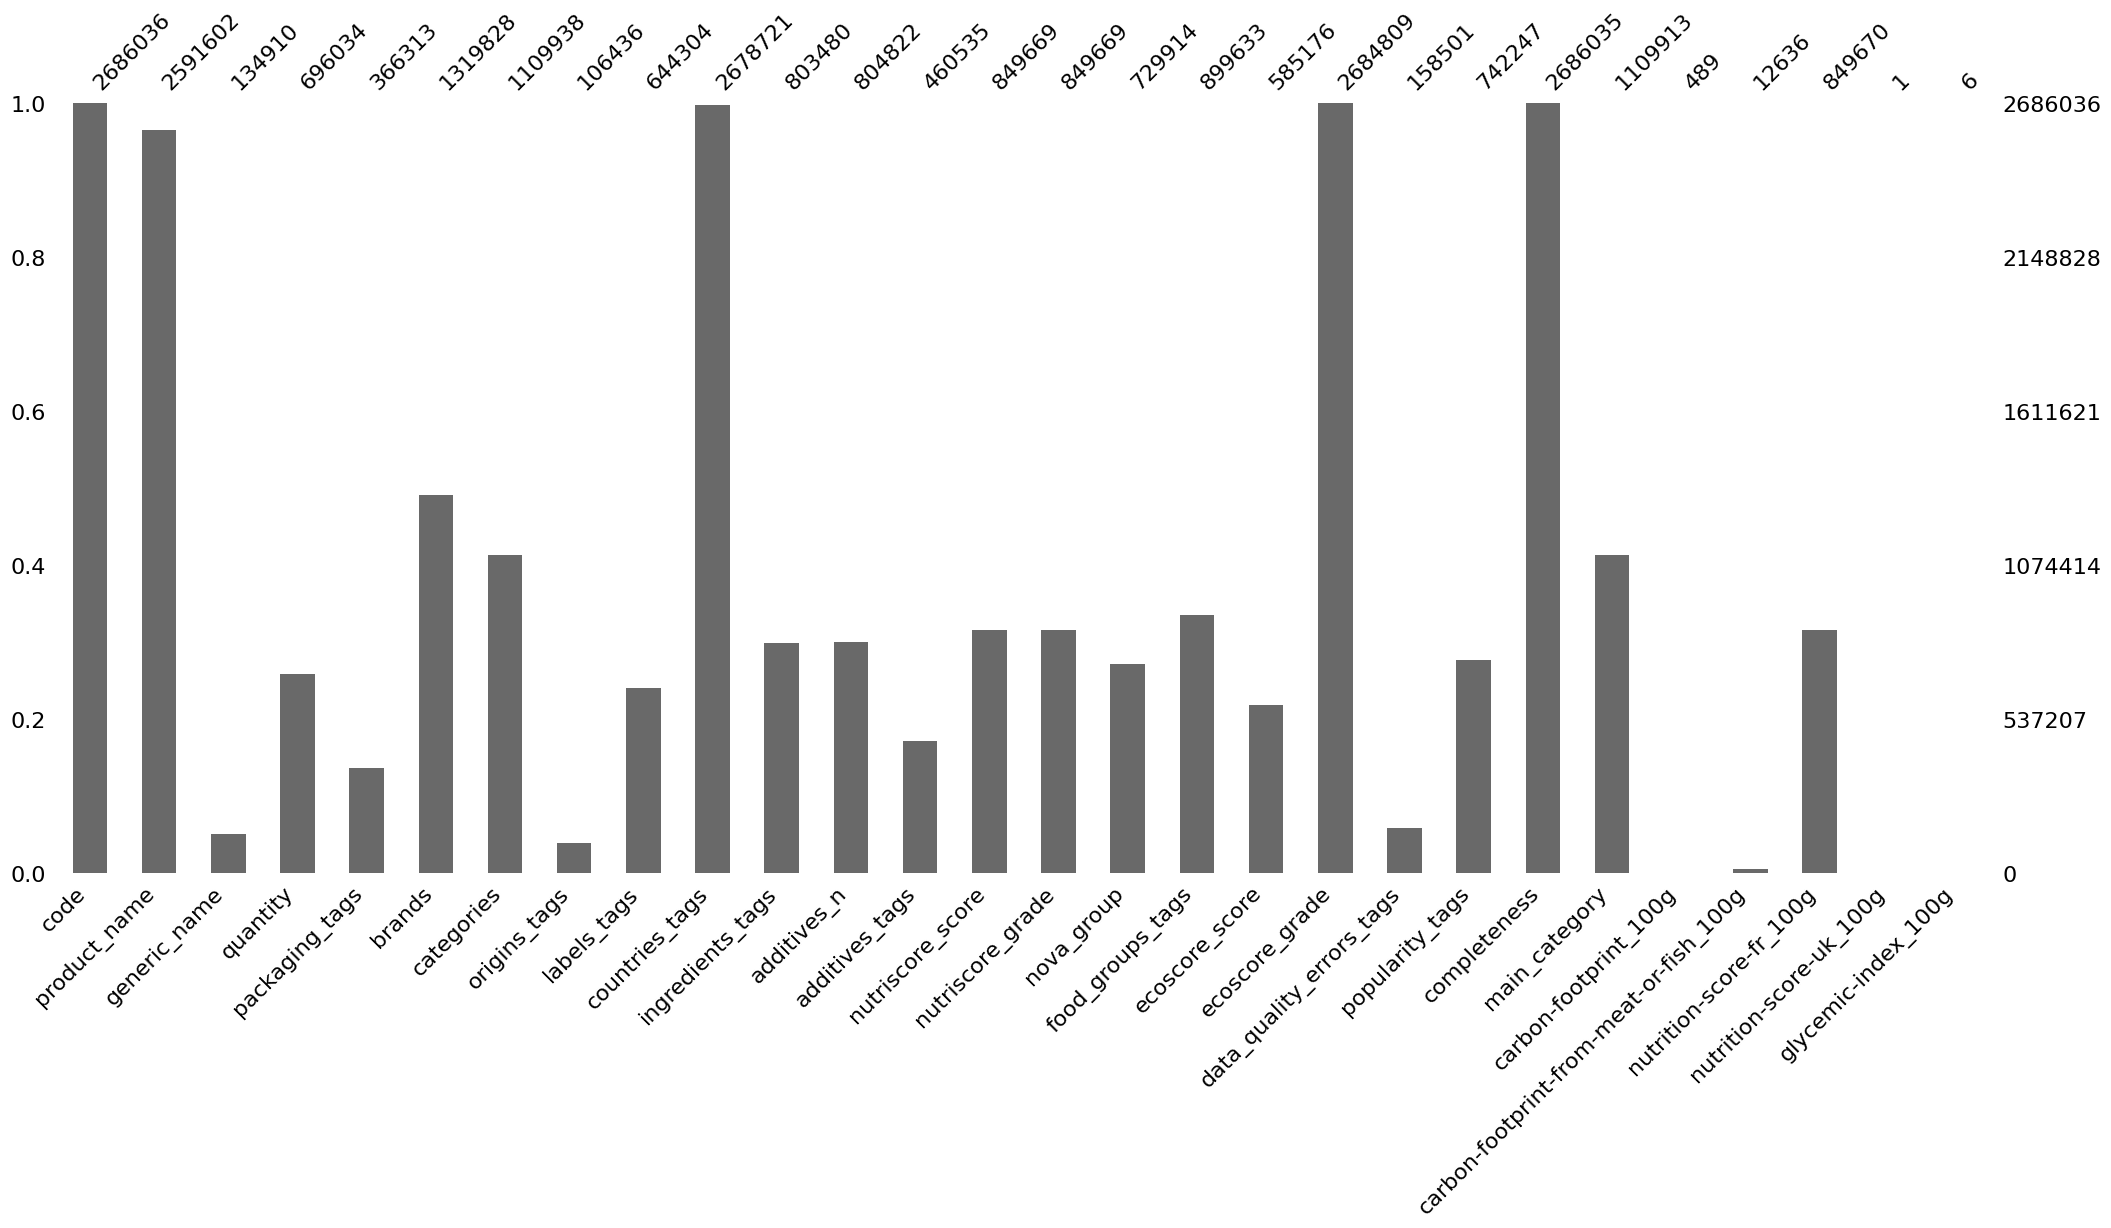

In [26]:
msno.bar(data)

In [27]:
# Are nutriscores any different? 
(data.nutriscore_score == data['nutrition-score-fr_100g']).sum()

849669

In [28]:
data.nutriscore_score.notnull().sum()

849669

In [9]:
# There is no difference between both features, so the last 5 columns
# can be dropped, as other hold almost no information.
features = data.columns[:-5].values
print(features)
data = data.loc[:,features]

['code' 'product_name' 'generic_name' 'quantity' 'packaging_tags' 'brands'
 'categories' 'origins_tags' 'labels_tags' 'countries_tags'
 'ingredients_tags' 'additives_n' 'additives_tags' 'nutriscore_score'
 'nutriscore_grade' 'nova_group' 'food_groups_tags' 'ecoscore_score'
 'ecoscore_grade' 'data_quality_errors_tags' 'popularity_tags'
 'completeness' 'main_category']


In [38]:
def top_values(data,
               col: str,
               print_n: int=10) -> pd.Series:
    ''' Return the first 10 (default)
        values of a series'''
    return (data.loc[:, col]
            .value_counts()
            .sort_values(ascending=False)
            .iloc[:print_n])

------------------------------
CODE :
percentage of data : 100.0 %
30383354190402    2
0071923722898     2
29994696          2
31843340000818    2
3564700673683     2
8760304600357     2
3760331890198     2
2700963001059     2
3700320230572     2
6703501220017     2
Name: code, dtype: int64


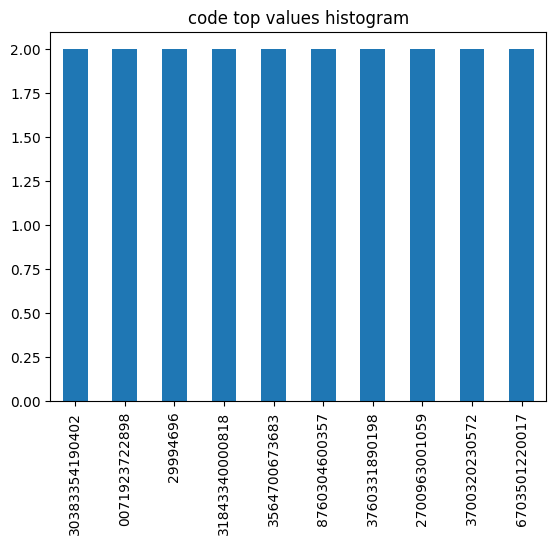


------------------------------
PRODUCT_NAME :
percentage of data : 96.48426156611453 %
Aceite de oliva virgen extra    1557
Miel                            1519
Filet de poulet                 1235
Spaghetti                       1062
Comté                           1058
Mozzarella                      1032
Chocolat                         997
Mayonnaise                       906
Poulet                           881
Ketchup                          879
Name: product_name, dtype: int64


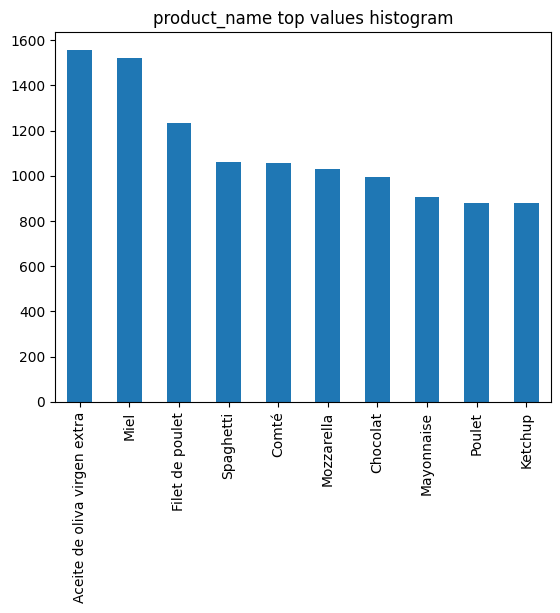


------------------------------
GENERIC_NAME :
percentage of data : 5.022643032334638 %
Pâtes alimentaires de qualité supérieure               323
Ice cream                                              180
Bière                                                  123
Pâtes alimentaires au blé dur de qualité supérieure    122
Beignets fourrés à la purée de framboise               122
Beignets fourrés à la purée de pomme                   113
Jambon cuit supérieur                                  104
Bière blonde                                           101
Fromage au lait pasteurisé                              91
Jus d'orange                                            88
Name: generic_name, dtype: int64


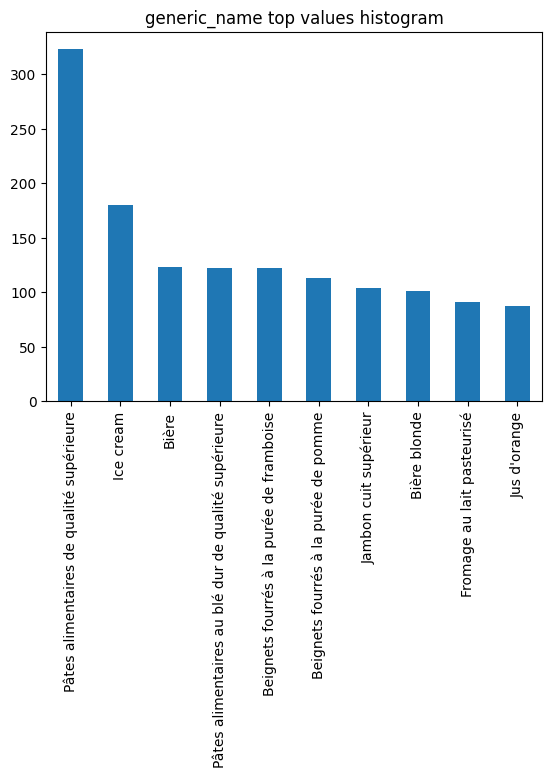


------------------------------
QUANTITY :
percentage of data : 25.913055521221608 %
500 g    26749
250 g    23448
200 g    23351
100 g    17777
1pcs     15781
400 g    15734
300 g    14174
150 g    13920
1 kg     10847
100g     10812
Name: quantity, dtype: int64


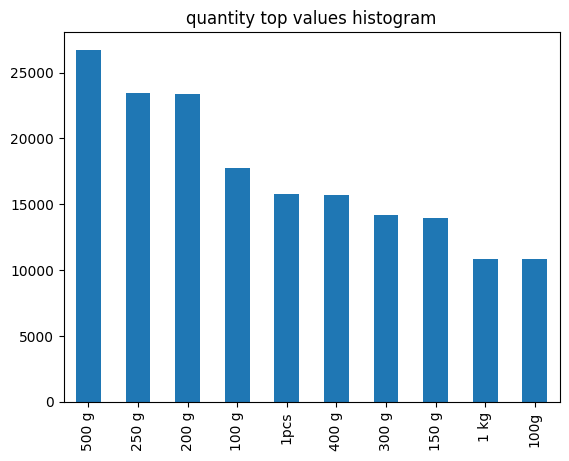


------------------------------
PACKAGING_TAGS :
percentage of data : 13.637680209796146 %
en:plastic                 43732
en:glass                   12066
en:plastic,en:bag          11996
en:bottle                   8826
en:bag                      8761
en:cardboard                6271
en:glass,en:bottle          5735
en:canned                   5084
en:paper                    4938
en:plastic,en:cardboard     4205
Name: packaging_tags, dtype: int64


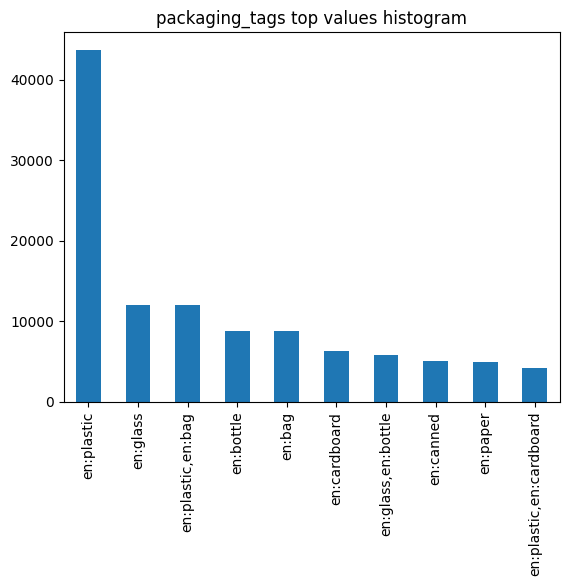


------------------------------
BRANDS :
percentage of data : 49.1366459719825 %
Carrefour    18903
Auchan       14016
Bonarea      10496
Delhaize      7102
Hacendado     7014
U             6798
Coop          6778
Lidl          6347
Nestlé        5863
Tesco         5480
Name: brands, dtype: int64


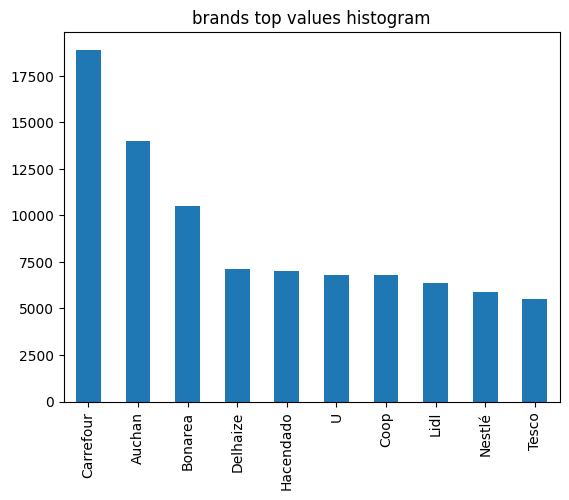


------------------------------
CATEGORIES :
percentage of data : 41.32252881197422 %
Snacks                                                                                                  33831
Snacks, Sweet snacks, Confectioneries                                                                   14683
Groceries, Sauces                                                                                       13465
Dairies, Fermented foods, Fermented milk products, Cheeses                                              11504
Snacks, Sweet snacks, Biscuits and cakes, Biscuits                                                      10667
Desserts, Frozen foods, Frozen desserts                                                                  9084
Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Breads                         7220
Frozen foods                                                                                             6930
Plant-based foods and beverages, P

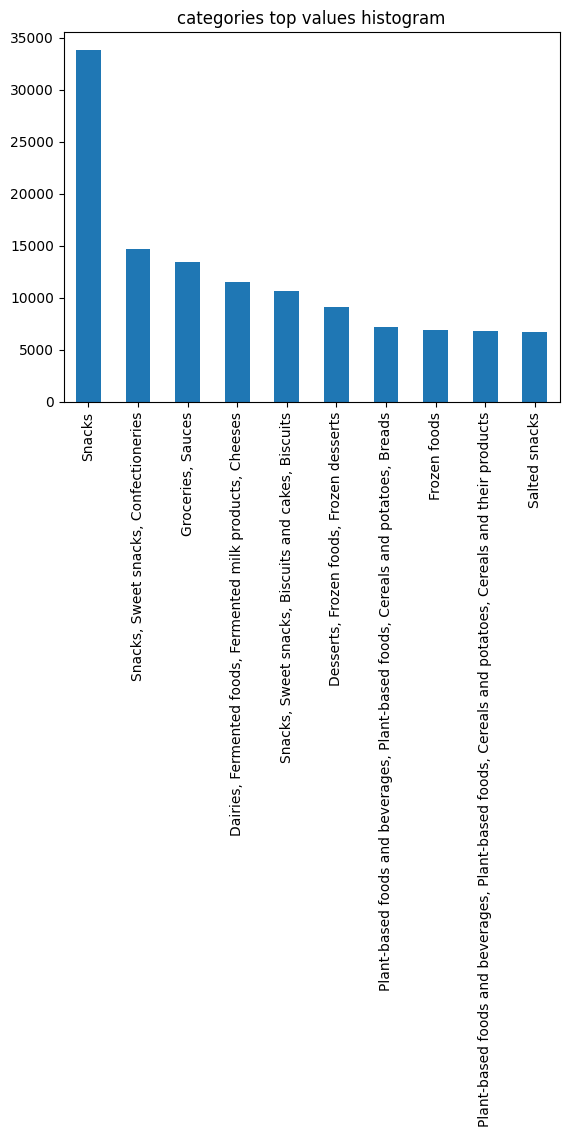


------------------------------
ORIGINS_TAGS :
percentage of data : 3.962567888144463 %
en:france            26485
en:italy              5673
en:european-union     4569
en:spain              4400
en:germany            3113
en:mexico             3034
en:united-states      1887
en:argentina          1375
en:switzerland        1264
en:poland             1233
Name: origins_tags, dtype: int64


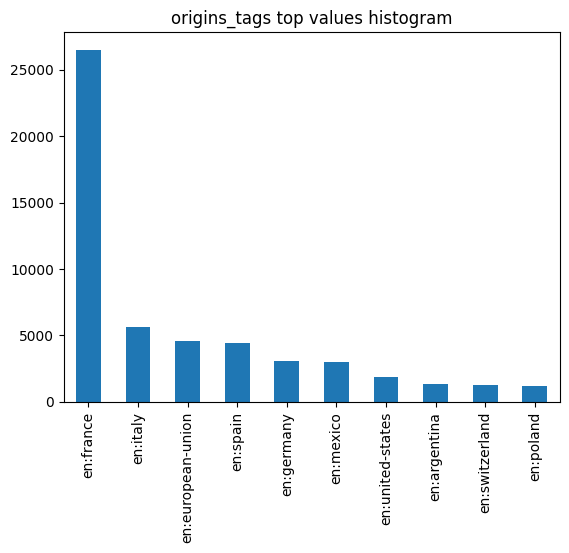


------------------------------
LABELS_TAGS :
percentage of data : 23.987169196540925 %
en:no-gluten                                             49732
en:organic                                               39956
en:vegetarian,en:vegan                                   32568
en:green-dot                                             19742
en:no-preservatives                                      19311
en:organic,en:eu-organic,fr:ab-agriculture-biologique    17619
en:made-in-france                                        13613
en:organic,en:eu-organic                                 10962
en:no-added-sugar                                        10457
en:no-colorings                                           9583
Name: labels_tags, dtype: int64


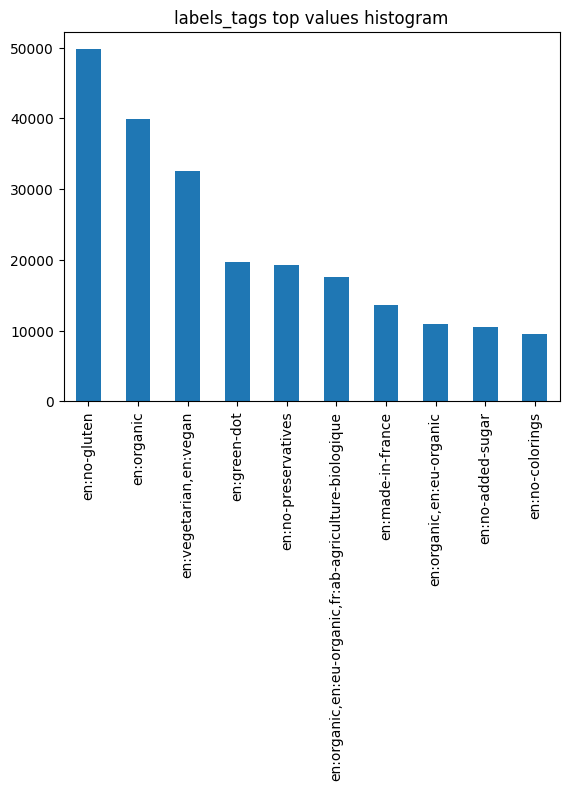


------------------------------
COUNTRIES_TAGS :
percentage of data : 99.72766560090781 %
en:france            864106
en:united-states     551675
en:spain             278102
en:italy             196610
en:germany           137515
en:united-kingdom     82282
en:canada             72052
en:switzerland        65641
en:belgium            65140
en:australia          29977
Name: countries_tags, dtype: int64


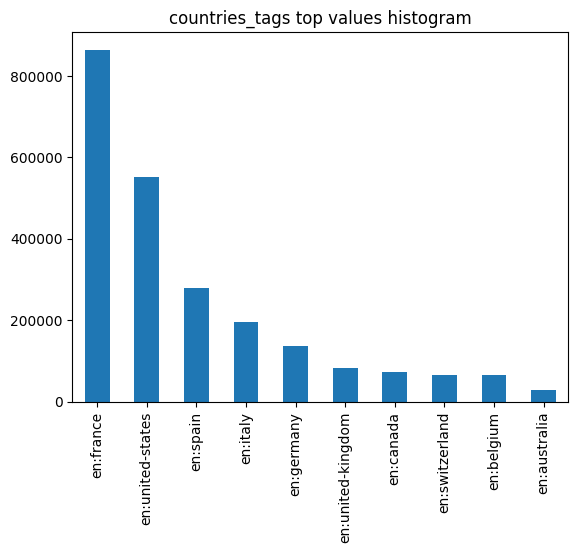


------------------------------
INGREDIENTS_TAGS :
percentage of data : 29.913225288119744 %
en:honey,en:added-sugar                                                                                                1491
en:extra-virgin-olive-oil,en:oil-and-fat,en:vegetable-oil-and-fat,en:vegetable-oil,en:olive-oil,en:virgin-olive-oil    1479
en:durum-wheat-semolina,en:cereal,en:wheat,en:durum-wheat,en:semolina                                                  1336
en:almond,en:nut,en:tree-nut                                                                                            951
en:carbonated-water,en:water,en:natural-flavouring,en:flavouring                                                        904
en:superior-quality-durum-wheat-semolina,en:cereal,en:wheat,en:durum-wheat,en:semolina,en:durum-wheat-semolina          849
en:egg                                                                                                                  761
en:orange-juice,en:fruit,en:citrus-frui

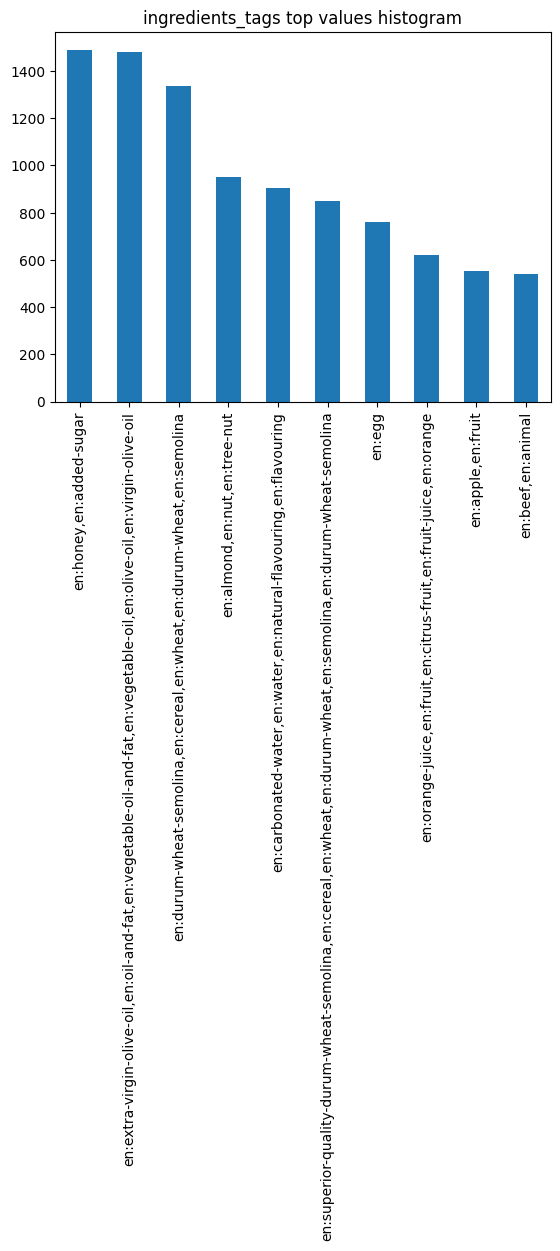


------------------------------
ADDITIVES_N :
percentage of data : 29.96318738840433 %
0.0    344287
1.0    138397
2.0     90093
3.0     63699
4.0     48117
5.0     34558
6.0     24140
7.0     17722
8.0     13248
9.0      8851
Name: additives_n, dtype: int64


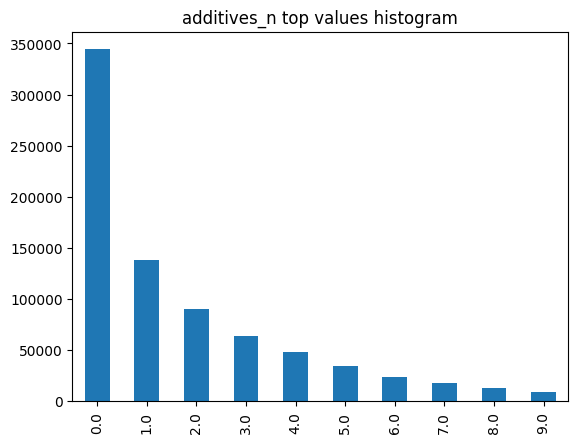


------------------------------
ADDITIVES_TAGS :
percentage of data : 17.145525972101638 %
en:e330              27447
en:e322,en:e322i     19335
en:e440               6964
en:e415               5314
en:e300               5071
en:e14xx              4244
en:e330,en:e440       3500
en:e500,en:e500ii     3360
en:e160b              3183
en:e322               2923
Name: additives_tags, dtype: int64


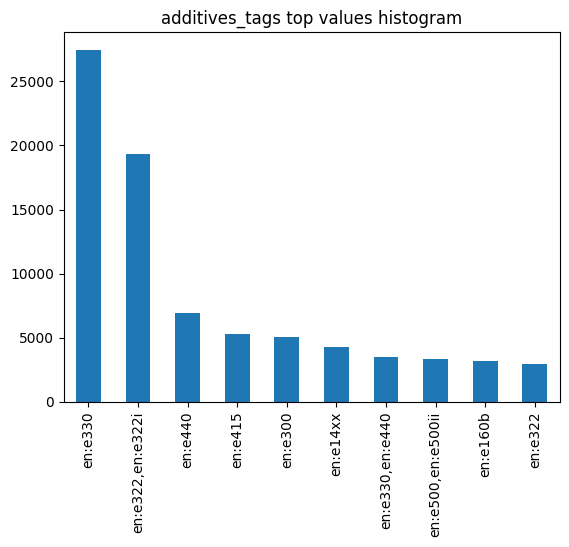


------------------------------
NUTRISCORE_SCORE :
percentage of data : 31.632822493816164 %
 0.0     47085
 14.0    44219
 2.0     39269
 13.0    39222
 11.0    38957
 1.0     38805
 15.0    35348
 12.0    35288
 3.0     34822
-1.0     34080
Name: nutriscore_score, dtype: int64


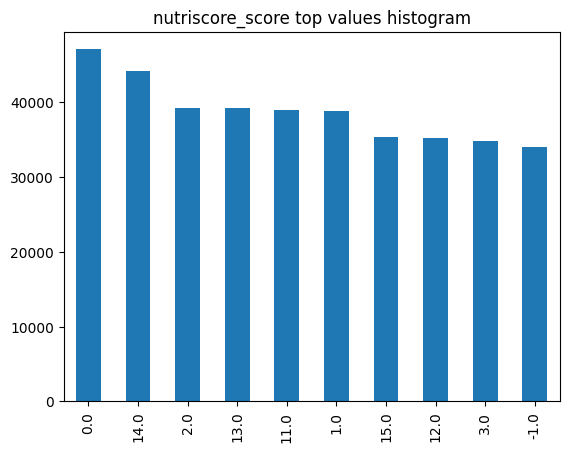


------------------------------
NUTRISCORE_GRADE :
percentage of data : 31.632822493816164 %
d    265340
c    183783
e    158279
a    123294
b    118973
Name: nutriscore_grade, dtype: int64


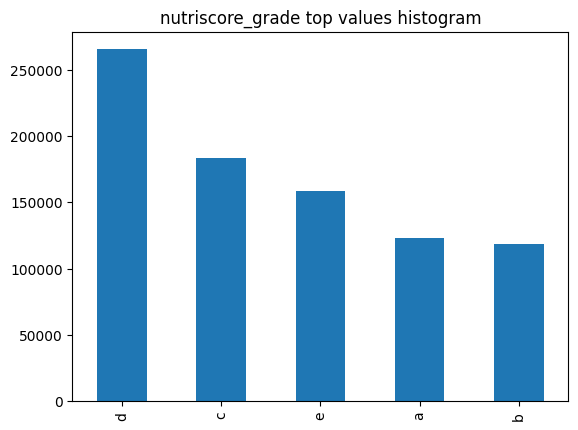


------------------------------
NOVA_GROUP :
percentage of data : 27.17439379070124 %
4.0    467180
3.0    141782
1.0     79484
2.0     41468
Name: nova_group, dtype: int64


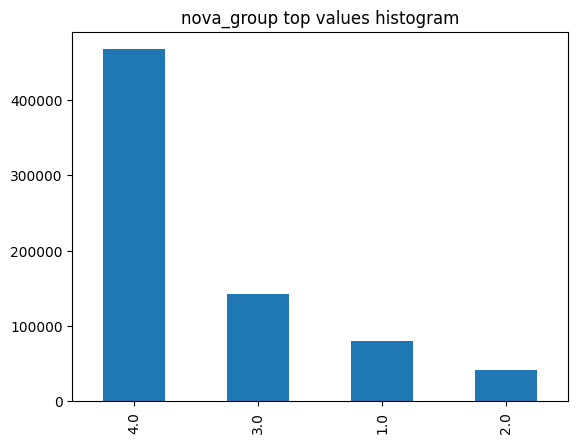


------------------------------
FOOD_GROUPS_TAGS :
percentage of data : 33.49296137505231 %
en:sugary-snacks,en:sweets                       85679
en:sugary-snacks,en:biscuits-and-cakes           72681
en:fats-and-sauces,en:dressings-and-sauces       61633
en:milk-and-dairy-products,en:cheese             54506
en:cereals-and-potatoes,en:cereals               50449
en:composite-foods,en:one-dish-meals             47432
en:fish-meat-eggs,en:processed-meat              45031
en:fruits-and-vegetables,en:vegetables           38622
en:milk-and-dairy-products,en:milk-and-yogurt    37385
en:beverages,en:sweetened-beverages              29200
Name: food_groups_tags, dtype: int64


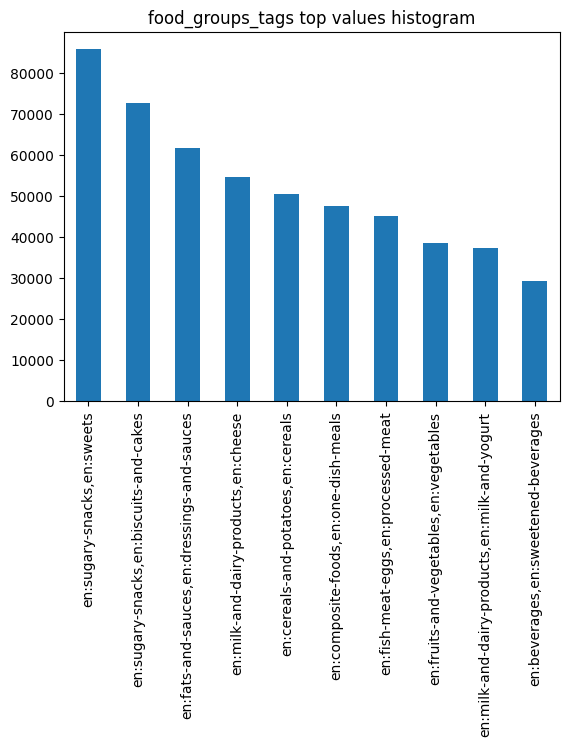


------------------------------
ECOSCORE_SCORE :
percentage of data : 21.78585841738532 %
79.0    41343
34.0    31010
72.0    22474
67.0    17752
49.0    17572
39.0    15747
27.0    15457
21.0    12168
77.0    11577
75.0    11247
Name: ecoscore_score, dtype: int64


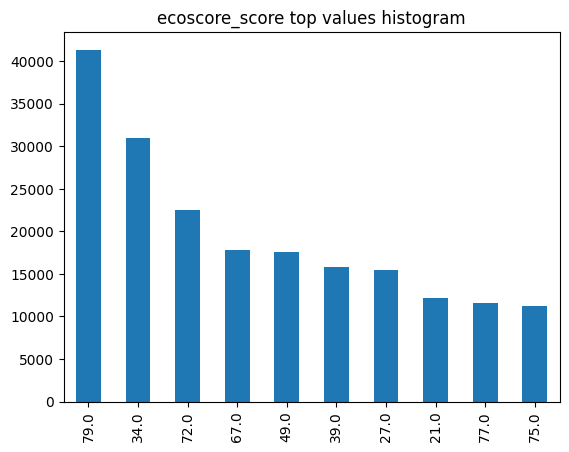


------------------------------
ECOSCORE_GRADE :
percentage of data : 99.95431930175172 %
unknown           2071972
b                  190121
d                  160612
c                  115610
e                   89980
a                   28853
not-applicable      27661
Name: ecoscore_grade, dtype: int64


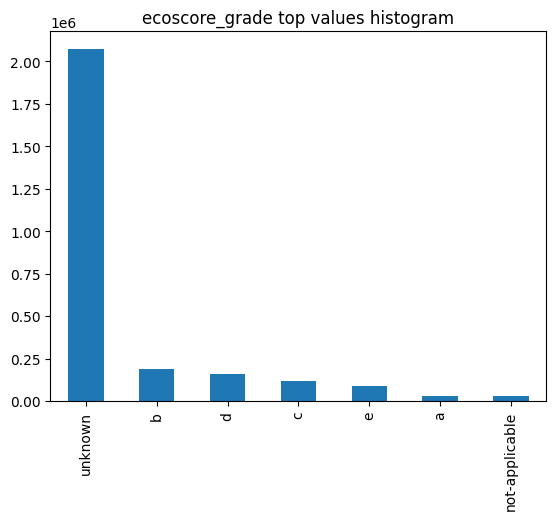


------------------------------
DATA_QUALITY_ERRORS_TAGS :
percentage of data : 5.900926123104828 %
en:energy-value-in-kcal-does-not-match-value-computed-from-other-nutrients                                                                             124433
en:nutrition-value-over-3800-energy,en:energy-value-in-kcal-does-not-match-value-computed-from-other-nutrients                                           4550
en:nutrition-value-total-over-105                                                                                                                        3956
en:nutrition-sugars-plus-starch-greater-than-carbohydrates                                                                                               3331
en:nutrition-saturated-fat-greater-than-fat                                                                                                              3247
en:energy-value-in-kj-does-not-match-value-computed-from-other-nutrients                                      

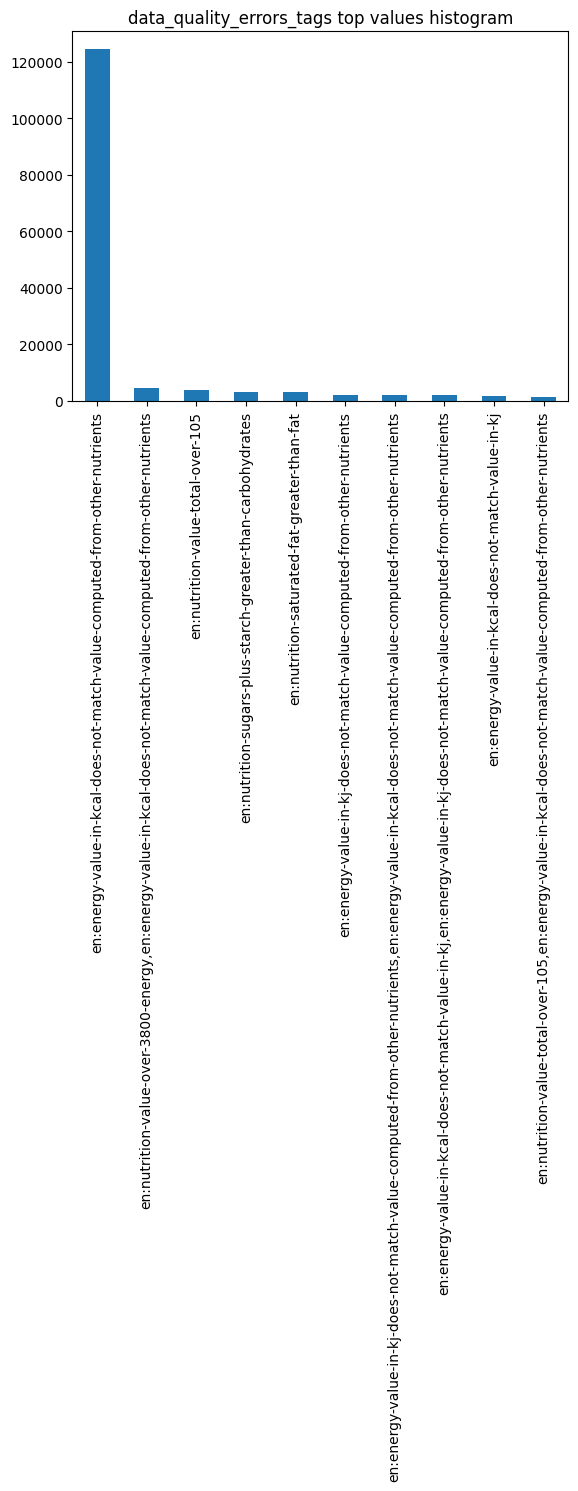


------------------------------
POPULARITY_TAGS :
percentage of data : 27.63354623690822 %
bottom-25-percent-scans-2020,bottom-20-percent-scans-2020,top-85-percent-scans-2020,top-90-percent-scans-2020,top-country-fr-scans-2020                                                                                                                                            25407
bottom-25-percent-scans-2019,bottom-20-percent-scans-2019,top-85-percent-scans-2019,top-90-percent-scans-2019,top-country-fr-scans-2019                                                                                                                                            23471
bottom-25-percent-scans-2021,bottom-20-percent-scans-2021,top-85-percent-scans-2021,top-90-percent-scans-2021,top-country-fr-scans-2021                                                                                                                                            20487
bottom-25-percent-scans-2019,bottom-20-percent-scans-2019,bottom-1

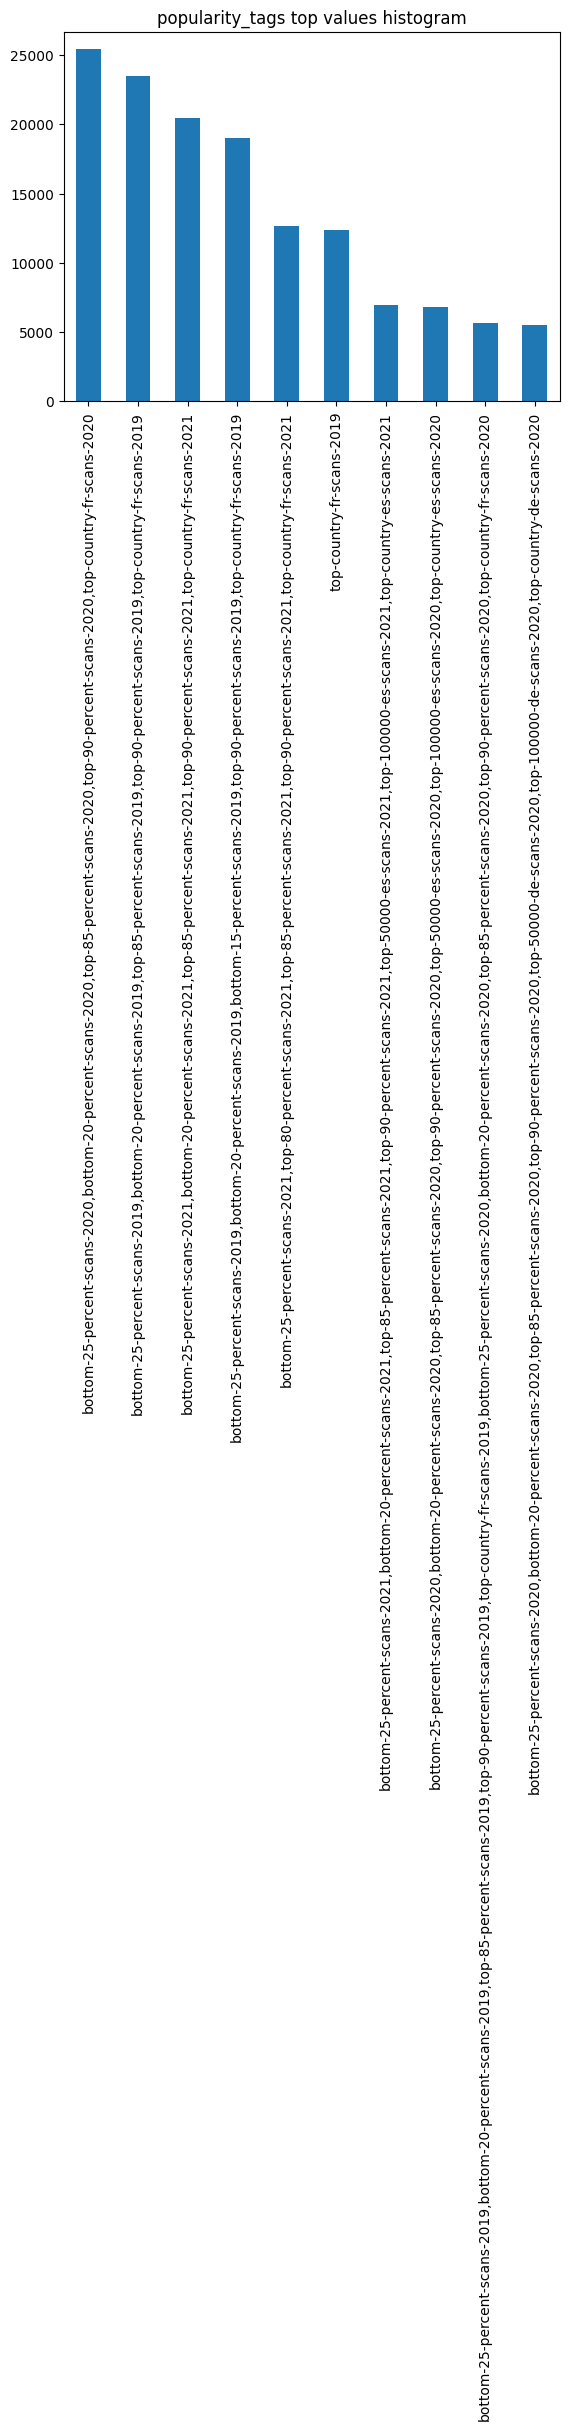


------------------------------
COMPLETENESS :
percentage of data : 99.99996277041707 %
0.2750    580720
0.3750    380473
0.4750    191398
0.4000    143834
0.5000    135708
0.1625    120080
0.2625    101503
0.5750     86276
0.3625     81632
0.7875     78812
Name: completeness, dtype: int64


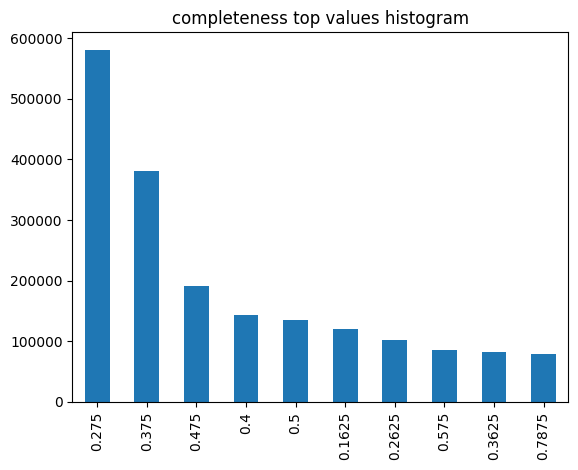


------------------------------
MAIN_CATEGORY :
percentage of data : 41.321598072401116 %
en:groceries                     68698
en:snacks                        34698
en:biscuits                      17298
en:cheeses                       16883
en:confectioneries               16583
en:beverages                     13726
en:breads                        10870
en:frozen-desserts                9638
en:yogurts                        8679
en:cereals-and-their-products     8672
Name: main_category, dtype: int64


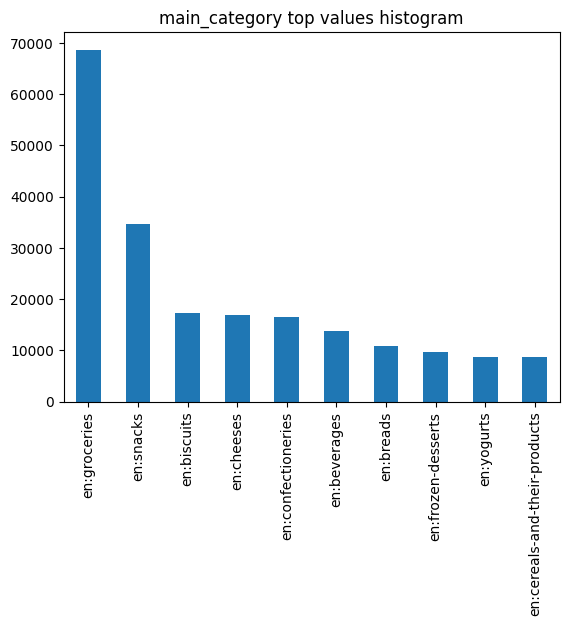

In [37]:
for feat in features:
    print('-'*30)
    print(feat.upper() +' :')
    print(f"percentage of data : {data[feat].notnull().mean()*100} %")
    top = top_values(data, feat)
    print(top)
    top.plot(kind='bar')
    plt.title(f"{feat} top values histogram")
    plt.show()    
    print('')

In [10]:
#data.to_csv('./csv_files/first_data_analyzed.csv')
data = pd.read_csv('./csv_files/first_data_analyzed.csv')

### Some comments

- code : possible duplicates !

- generic_name : 5%... can be discarded

- One interesting feature is data_quality_errors_tags. 
It is probably a feature generated by processing the information entered by the open food facts app user and controlling if there is consistency in what was provided.

- popularity_tags could be use to anticipate client satisfaction rate. Indeed, we need to be able to provide a high rate of decent results on top scanned products.

- completeness might calculate the ratio of the row not null content?

- nutriscore_score and nutriscore_grade well represented.

- ecoscore_grade : not in interesting in the world (the vast majority is 'unknown')

- ecoscore : Can be interesting.

- are food groups, categories and main_category quite similar?

- some nice label_tags (no-gluten, organic, vegan/vegetarian, made in France, no-added-sugar) for an app?

- brands : appearance of Carrefour, Auchan, U, Lidl. (Could be the start of major brands quality comparison (but are there enough product to be compared?)).

- Nova score (almost same percentage as nutriscore, is it for the same elements?)


Now, I want to filter on french products because the application I want to design is for "Santé Publique France" and there are a lot of product indexed.

In [48]:
# Filtering on french products
data = data.loc[data.countries_tags
                .str.contains('france', case=False, na=False),:]
print(data.shape)
display(data.head())

(946118, 23)


,code,product_name,generic_name,quantity,packaging_tags,brands,categories,origins_tags,labels_tags,countries_tags,...,nutriscore_score,nutriscore_grade,nova_group,food_groups_tags,ecoscore_score,ecoscore_grade,data_quality_errors_tags,popularity_tags,completeness,main_category
0,00000000000000225,jeunes pousses,NaN,NaN,NaN,endives,NaN,NaN,NaN,en:france,...,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,0.2000,NaN
3,00000000000026772226,Skyr,NaN,480 g,NaN,Danone,"Produits laitiers, Desserts, Produits fermenté...",NaN,NaN,en:france,...,-5.0,a,NaN,"en:milk-and-dairy-products,en:dairy-desserts",34.0,d,NaN,NaN,0.5750,en:cream-cheeses
4,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,...,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,0.2750,NaN
5,0000000000031,Cacao,NaN,130 g,NaN,NaN,NaN,NaN,NaN,en:france,...,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,0.2625,NaN
10,0000000000100,moutarde au moût de raisin,NaN,100g,NaN,courte paille,"en:groceries, Condiments, Sauces, Moutardes",NaN,fr:delois-france,en:france,...,18.0,d,NaN,"en:fats-and-sauces,en:dressings-and-sauces",54.0,c,NaN,NaN,0.7625,en:groceries


<AxesSubplot: >

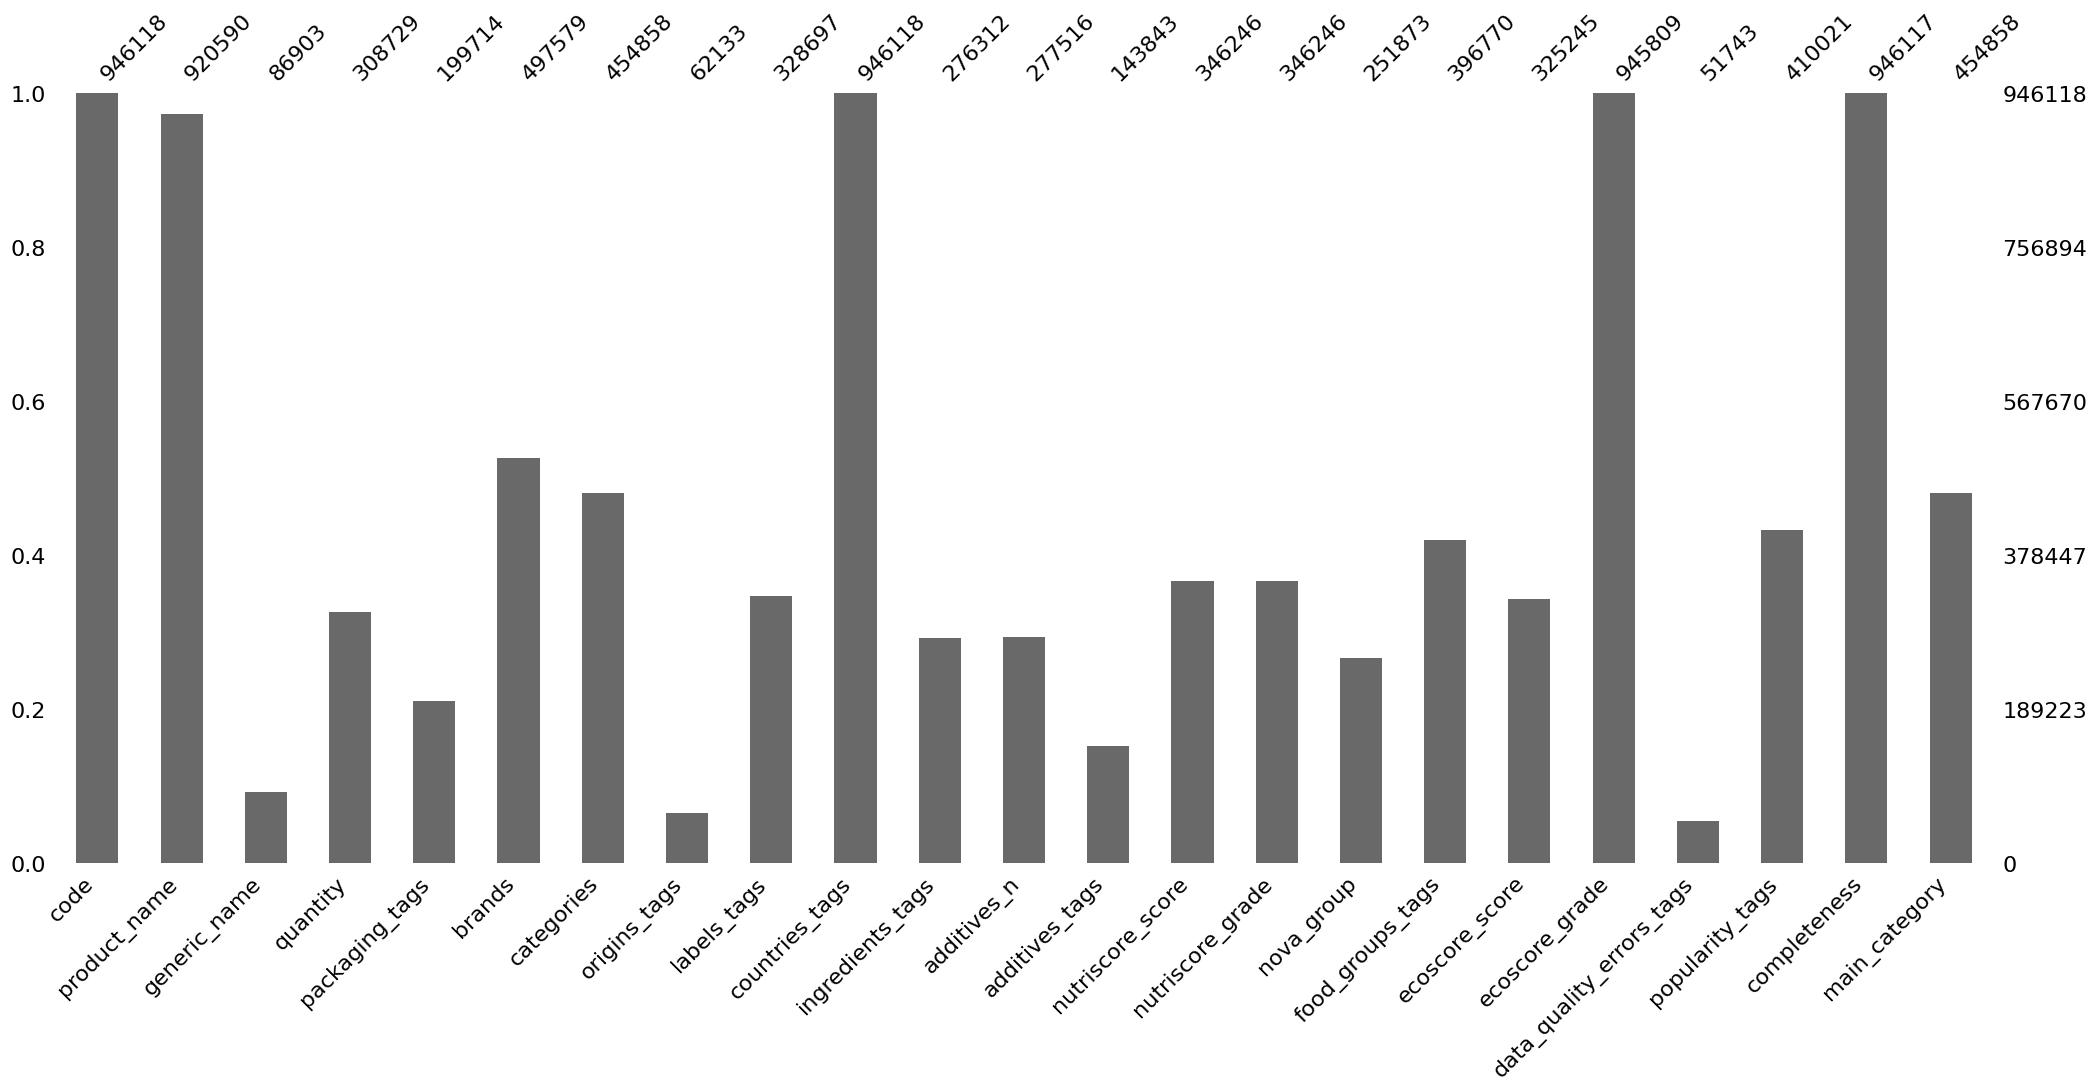

In [43]:
msno.bar(data)

/tmp/ipykernel_10200/2810548857.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(data.corr()), annot=data.corr(), fmt=".2f", linewidth=.5,


<AxesSubplot: >

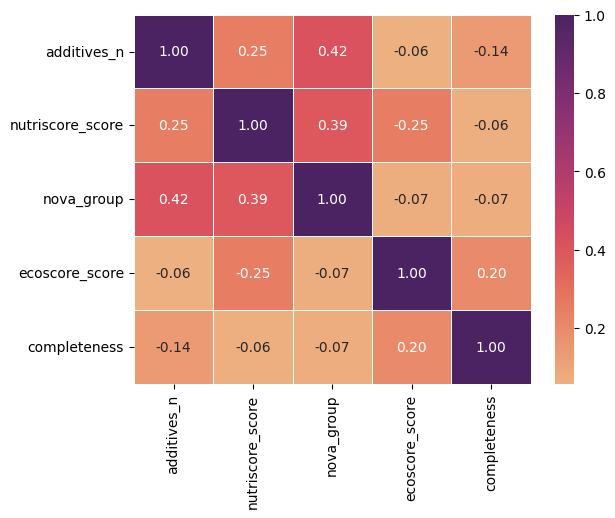

In [19]:
# cmap in abs() but displayed value are signed.
sns.heatmap(abs(data.corr()), annot=data.corr(), fmt=".2f", linewidth=.5,
            cmap='flare', vmax=1)

- nutriscore_score goes from -15 to 40 and
the grade do not have the same amplitude!
([found here, page 36](https://nutrition.coeur-herault.fr/sites/default/files/files/fichiers/qr_scientifique_technique_nutriscore-120320.pdf))

     <img src="./images/nutriscore->grade.png"
          width="500"/>

- ecoscore_score ranges from -40 to 135 (with malus bonus) but has it's core between 0 and 100.

     <img src="./images/ecoscore->grade.png"
          width="500">

- Nova score : 

     <img src="./images/nova.png"
          width="300">

Hence, this explains in part :
- why nova and nutriscore are a bit correlated.
- why there is a small anti-correlation between the nutriscore and ecoscore. A negative nutriscore is the best, and and high ecoscore is the best. However, the small value of R² is not to be ignored and we are from any generalization. Proof being with next plots.


<AxesSubplot: xlabel='nutriscore_score', ylabel='ecoscore_score'>

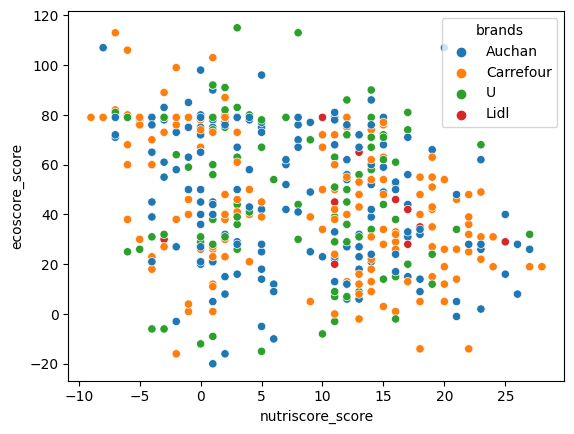

In [57]:
# selecting data with only 4 brands
data_br4 = data.loc[(data.brands == 'Carrefour')
                    |(data.brands == 'Auchan')
                    |(data.brands == 'U')
                    |(data.brands == 'Lidl'), :]

sns.scatterplot(data=data_br4.sample(1000),
                x='nutriscore_score',
                y='ecoscore_score',
                hue='brands')

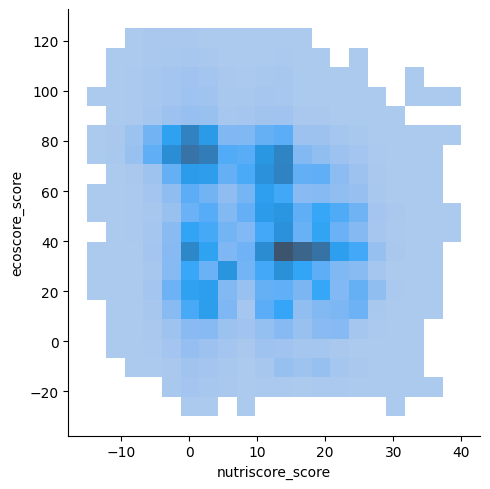

In [21]:
sns.displot(data=data,
            x='nutriscore_score',
            y='ecoscore_score',
            bins=20)

<AxesSubplot: xlabel='nova_group', ylabel='nutriscore_score'>

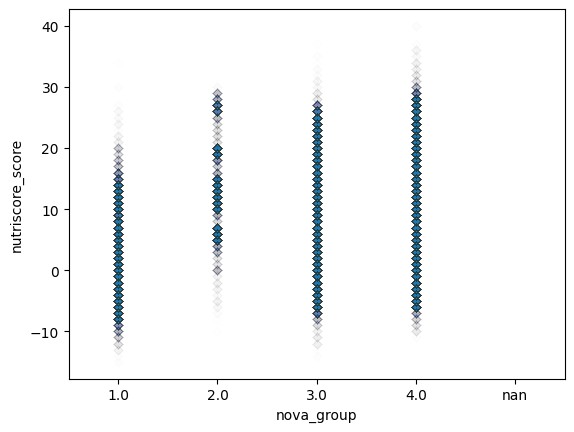

In [72]:
sns.stripplot(data=data,
                y='nutriscore_score',
                x='nova_group',
                jitter=False, s=5, marker="D",
                linewidth=1, alpha=.005)

<AxesSubplot: xlabel='nova_group', ylabel='nutriscore_score'>

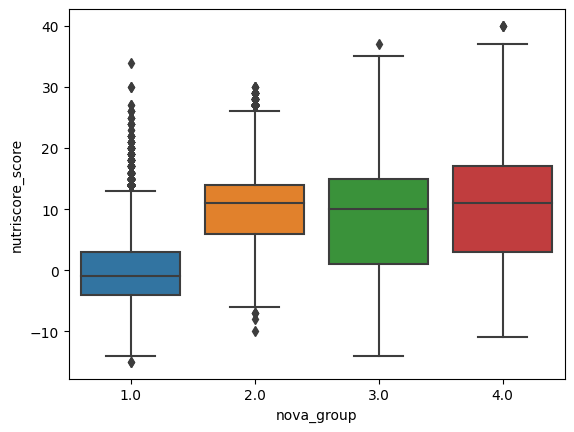

In [71]:
sns.boxplot(data=data, y='nutriscore_score',
            x='nova_group')